# Preparação dos Datasets

In [2]:
import pandas as pd

Importação dos datasets do repositório do github

In [3]:
df_metaheuristicos = pd.read_csv("https://raw.githubusercontent.com/WLAraujo/graphcol/main/experimentos/resultados/Dados%20experimento%20-%20Metaheur%C3%ADsticas.csv")

In [4]:
df_gulosos = pd.read_csv("https://raw.githubusercontent.com/WLAraujo/graphcol/main/experimentos/resultados/Dados%20experimentos%20-%20Gulosos.csv")

In [5]:
df_instancias = pd.read_csv("https://raw.githubusercontent.com/WLAraujo/graphcol/main/experimentos/resultados/Tabela%20de%20inst%C3%A2ncias.csv")

Adição de coluna com grupos das instâncias

In [6]:
col_grupo = [
    "book",
    "book",
    "games",
    "book",
    "book",
    "miles",
    "mycielskian",
    "mycielskian",
    "mycielskian",
    "mycielskian",
    "mycielskian",
    "queens",
    "queens",
    "queens",
    "queens",
    "queens",
    "queens",
    "miles",
    "miles",
    "miles"
]

In [7]:
df_instancias["familia"] = col_grupo

Join entre as tabelas de instâncias e as tabelas de resultados, depois é aplicado drop das colunas repetidas

In [8]:
df_metaheuristicos_1 = df_metaheuristicos.join(df_instancias.set_index('Instância'), on='instancia')

In [9]:
df_gulosos_1 = df_gulosos.join(df_instancias.set_index('Instância'), on='instancia')

In [10]:
df_metaheuristicos_2 = df_metaheuristicos_1.drop(columns=["otimo", "Vértices", "Arestas"])

In [11]:
df_gulosos_2 = df_gulosos_1.drop(columns=["otimo", "Vértices", "Arestas"])

Padronização do formato de tempo e cálculo da coluna com tempo de execução

In [12]:
from datetime import datetime

In [13]:
df_metaheuristicos_2['inicio'] = pd.to_datetime(df_metaheuristicos_2['inicio'], format='%Y-%m-%d %H:%M:%S.%f')
df_metaheuristicos_2['fim'] = pd.to_datetime(df_metaheuristicos_2['fim'], format='%Y-%m-%d %H:%M:%S.%f')

In [14]:
df_gulosos_2['inicio'] = pd.to_datetime(df_gulosos_2['inicio'], format='%Y-%m-%d %H:%M:%S.%f')
df_gulosos_2['fim'] = pd.to_datetime(df_gulosos_2['fim'], format='%Y-%m-%d %H:%M:%S.%f')

In [15]:
df_gulosos_2['tempo_execucao'] =pd.to_timedelta(df_gulosos_2['fim'] - df_gulosos_2['inicio']).astype('timedelta64[ms]').map('{:,.3f}'.format)

In [16]:
df_metaheuristicos_2['tempo_execucao'] = df_metaheuristicos_2['fim'] - df_metaheuristicos_2['inicio']

Cálculo do delta entre a solução ótima e a solução devolvida

In [17]:
df_gulosos_2['diff_resultado'] = df_gulosos_2['resultado'] - df_gulosos_2['Sol Ótima']

In [18]:
df_metaheuristicos_2['diff_resultado'] = df_metaheuristicos_2['resultado'] - df_metaheuristicos_2['Sol Ótima']

In [19]:
df_gulosos_2

,algoritmo,instancia,vertices,arestas,resultado,inicio,fim,Sol Ótima,familia,tempo_execucao,diff_resultado
0,guloso,anna,138,493,11,2023-02-22 23:21:25.531310,2023-02-22 23:21:26.555160,11,book,"1,023.000",0
1,dsatur,anna,138,493,11,2023-02-22 23:21:26.555180,2023-02-22 23:21:27.174465,11,book,619.000,0
2,rlf,anna,138,493,12,2023-02-22 23:21:27.174469,2023-02-22 23:21:27.175066,11,book,0.000,1
3,guloso,anna,138,493,12,2023-02-23 01:02:12.498937,2023-02-23 01:02:14.100725,11,book,"1,601.000",1
4,dsatur,anna,138,493,11,2023-02-23 01:02:14.100731,2023-02-23 01:02:14.928728,11,book,827.000,0
...,...,...,...,...,...,...,...,...,...,...,...
595,dsatur,miles1000,128,3216,43,2023-03-07 17:27:02.634127,2023-03-07 17:27:03.182919,42,miles,548.000,1
596,rlf,miles1000,128,3216,46,2023-03-07 17:27:03.182923,2023-03-07 17:27:03.184314,42,miles,1.000,4
597,guloso,miles1000,128,3216,44,2023-03-07 20:02:14.079386,2023-03-07 20:02:14.841192,42,miles,761.000,2
598,dsatur,miles1000,128,3216,44,2023-03-07 20:02:14.841197,2023-03-07 20:02:15.636809,42,miles,795.000,2


In [20]:
df_metaheuristicos_2

,algoritmo,instancia,vertices,arestas,resultado,tabu,iteracoes_min,iteracoes_max,iteracoes_s_mud_mel,hc_div,...,geracoes,cf_alfa,cf_beta,cf_evaporacao,inicio,fim,Sol Ótima,familia,tempo_execucao,diff_resultado
0,tabucol,huck,74,301,46,3,20,50,8,0.0,...,0,0.0,0.0,0.00,2023-02-24 20:44:55.307970,2023-02-24 20:44:55.322894,11,book,0 days 00:00:00.014924,35
1,tabucol,huck,74,301,44,3,20,50,10,0.0,...,0,0.0,0.0,0.00,2023-02-24 20:44:55.823487,2023-02-24 20:44:55.836720,11,book,0 days 00:00:00.013233,33
2,tabucol,huck,74,301,45,3,20,50,12,0.0,...,0,0.0,0.0,0.00,2023-02-24 20:44:56.337311,2023-02-24 20:44:56.351455,11,book,0 days 00:00:00.014144,34
3,tabucol,huck,74,301,43,3,20,50,14,0.0,...,0,0.0,0.0,0.00,2023-02-24 20:44:56.852052,2023-02-24 20:44:56.865382,11,book,0 days 00:00:00.013330,32
4,tabucol,huck,74,301,47,5,20,50,8,0.0,...,0,0.0,0.0,0.00,2023-02-24 20:44:57.365949,2023-02-24 20:44:57.372977,11,book,0 days 00:00:00.007028,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12795,colonia formigas,miles1000,128,3216,47,0,0,20,0,0.0,...,0,1.0,1.0,0.90,2023-03-07 21:35:10.586666,2023-03-07 21:45:44.747388,42,miles,0 days 00:10:34.160722,5
12796,colonia formigas,miles1000,128,3216,48,0,0,20,0,0.0,...,0,1.0,1.0,0.15,2023-03-07 21:45:45.247957,2023-03-07 21:58:46.247935,42,miles,0 days 00:13:00.999978,6
12797,colonia formigas,miles1000,128,3216,49,0,0,20,0,0.0,...,0,1.0,1.0,0.40,2023-03-07 21:58:46.748496,2023-03-07 22:11:47.799129,42,miles,0 days 00:13:01.050633,7
12798,colonia formigas,miles1000,128,3216,45,0,0,20,0,0.0,...,0,1.0,1.0,0.65,2023-03-07 22:11:48.299696,2023-03-07 22:28:22.976796,42,miles,0 days 00:16:34.677100,3


Verificando e convertendo os tipos

In [21]:
df_gulosos_2.dtypes

algoritmo                 object
instancia                 object
vertices                   int64
arestas                    int64
resultado                  int64
inicio            datetime64[ns]
fim               datetime64[ns]
Sol Ótima                  int64
familia                   object
tempo_execucao            object
diff_resultado             int64
dtype: object

In [22]:
df_gulosos_2['tempo_execucao'] = df_gulosos_2['tempo_execucao'].replace(',','', regex=True)
df_gulosos_2['tempo_execucao'] = df_gulosos_2['tempo_execucao'].astype(float)

In [23]:
df_metaheuristicos_2.dtypes

algoritmo                       object
instancia                       object
vertices                         int64
arestas                          int64
resultado                        int64
tabu                             int64
iteracoes_min                    int64
iteracoes_max                    int64
iteracoes_s_mud_mel              int64
hc_div                         float64
populacao                        int64
geracoes                         int64
cf_alfa                        float64
cf_beta                        float64
cf_evaporacao                  float64
inicio                  datetime64[ns]
fim                     datetime64[ns]
Sol Ótima                        int64
familia                         object
tempo_execucao         timedelta64[ns]
diff_resultado                   int64
dtype: object

In [24]:
df_metaheuristicos_2['tempo_execucao'] = df_metaheuristicos_2['tempo_execucao'].dt.total_seconds() * 1000
df_metaheuristicos_2

,algoritmo,instancia,vertices,arestas,resultado,tabu,iteracoes_min,iteracoes_max,iteracoes_s_mud_mel,hc_div,...,geracoes,cf_alfa,cf_beta,cf_evaporacao,inicio,fim,Sol Ótima,familia,tempo_execucao,diff_resultado
0,tabucol,huck,74,301,46,3,20,50,8,0.0,...,0,0.0,0.0,0.00,2023-02-24 20:44:55.307970,2023-02-24 20:44:55.322894,11,book,14.924,35
1,tabucol,huck,74,301,44,3,20,50,10,0.0,...,0,0.0,0.0,0.00,2023-02-24 20:44:55.823487,2023-02-24 20:44:55.836720,11,book,13.233,33
2,tabucol,huck,74,301,45,3,20,50,12,0.0,...,0,0.0,0.0,0.00,2023-02-24 20:44:56.337311,2023-02-24 20:44:56.351455,11,book,14.144,34
3,tabucol,huck,74,301,43,3,20,50,14,0.0,...,0,0.0,0.0,0.00,2023-02-24 20:44:56.852052,2023-02-24 20:44:56.865382,11,book,13.330,32
4,tabucol,huck,74,301,47,5,20,50,8,0.0,...,0,0.0,0.0,0.00,2023-02-24 20:44:57.365949,2023-02-24 20:44:57.372977,11,book,7.028,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12795,colonia formigas,miles1000,128,3216,47,0,0,20,0,0.0,...,0,1.0,1.0,0.90,2023-03-07 21:35:10.586666,2023-03-07 21:45:44.747388,42,miles,634160.722,5
12796,colonia formigas,miles1000,128,3216,48,0,0,20,0,0.0,...,0,1.0,1.0,0.15,2023-03-07 21:45:45.247957,2023-03-07 21:58:46.247935,42,miles,780999.978,6
12797,colonia formigas,miles1000,128,3216,49,0,0,20,0,0.0,...,0,1.0,1.0,0.40,2023-03-07 21:58:46.748496,2023-03-07 22:11:47.799129,42,miles,781050.633,7
12798,colonia formigas,miles1000,128,3216,45,0,0,20,0,0.0,...,0,1.0,1.0,0.65,2023-03-07 22:11:48.299696,2023-03-07 22:28:22.976796,42,miles,994677.100,3


Importando o seaborn

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Análise dos algoritmos Gulosos

## Análise da qualidade da solução

Qual a quantidade de soluções devolvidas com cada valor de diferença para a solução ótima

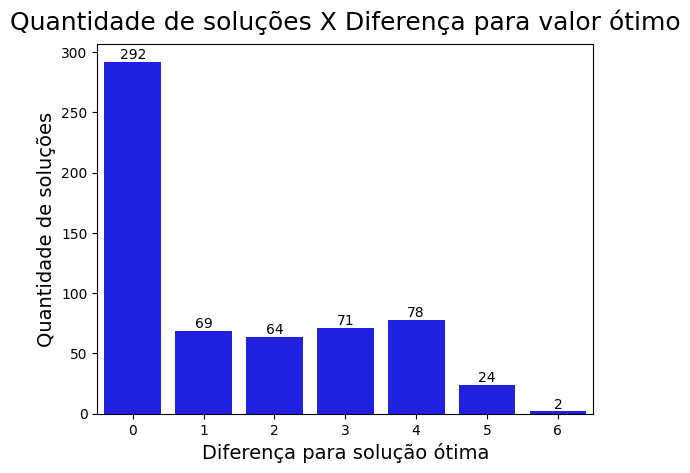

In [26]:
ax = sns.countplot(x=df_gulosos_2["diff_resultado"], color="blue")
plt.title('Quantidade de soluções X Diferença para valor ótimo', fontsize=18, pad=10)
plt.ylabel('Quantidade de soluções', fontsize=14)
plt.xlabel('Diferença para solução ótima', fontsize=14)
plt.bar_label(ax.containers[0], fmt='%.0f')
plt.show()

Abrindo isso por algoritmo

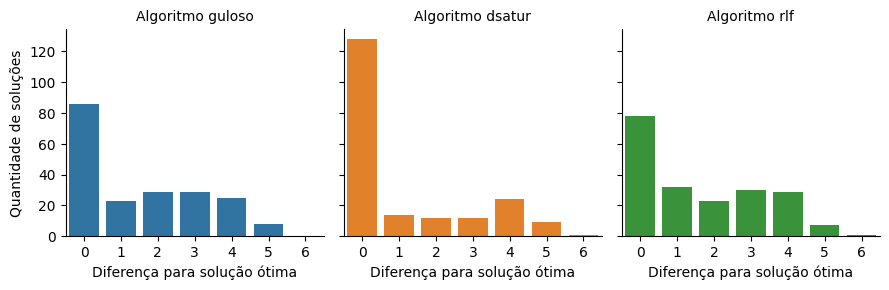

In [27]:
g = sns.FacetGrid(df_gulosos_2, col="algoritmo", margin_titles=True, hue="algoritmo")
g.map_dataframe(sns.countplot, x="diff_resultado")
plt.title('Quantidade de soluções X Diferença para valor ótimo (Por algoritmo)', fontsize=18, pad=10)
g.set_axis_labels("Diferença para solução ótima", "Quantidade de soluções")
g.set_titles(col_template="Algoritmo {col_name}")
plt.show()

Qual diferença média da solução ótima por algoritmo

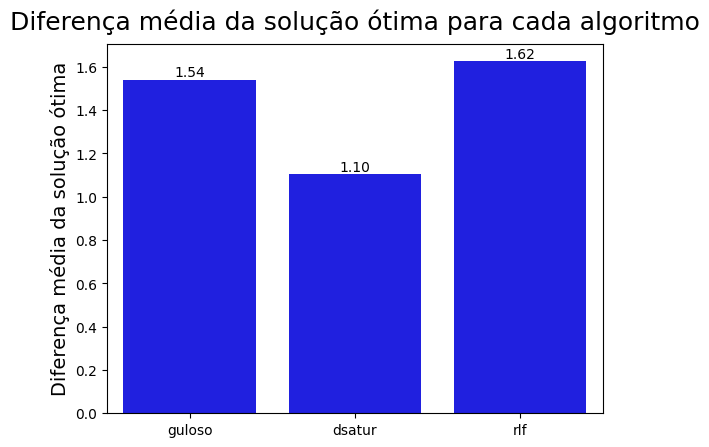

In [28]:
ax = sns.barplot(x=df_gulosos_2["algoritmo"], y=df_gulosos_2["diff_resultado"], color= 'blue', estimator='mean', errorbar=None)
plt.title('Diferença média da solução ótima para cada algoritmo', fontsize=18, pad=10)
plt.ylabel('Diferença média da solução ótima', fontsize=14)
plt.xlabel('', fontsize=14)
plt.bar_label(ax.containers[0], fmt='%.2f')
plt.show()

Abrindo por família de instância os resultados de diferença para solução ótima

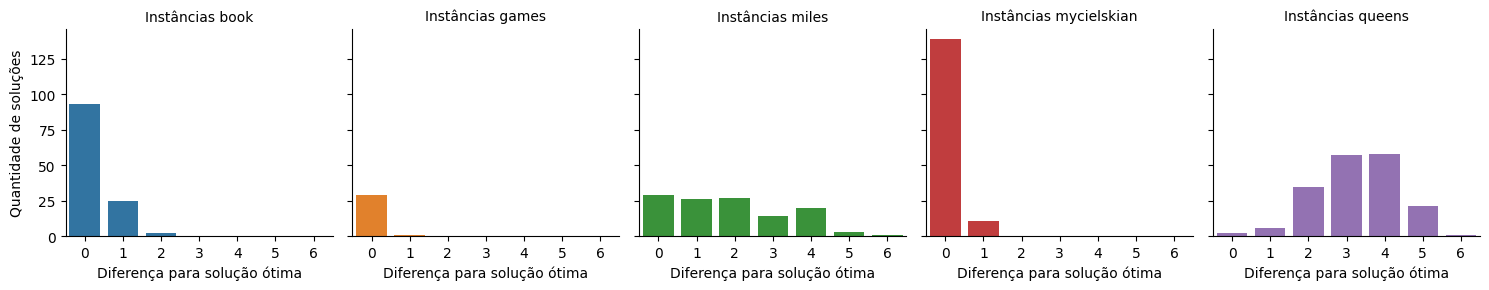

In [29]:
g = sns.FacetGrid(df_gulosos_2, col="familia", margin_titles=True, hue="familia")
g.map_dataframe(sns.countplot, x="diff_resultado")
g.set_axis_labels("Diferença para solução ótima", "Quantidade de soluções")
g.set_titles(col_template="Instâncias {col_name}")
plt.show()

Qual diferença média da solução ótima por família de instância

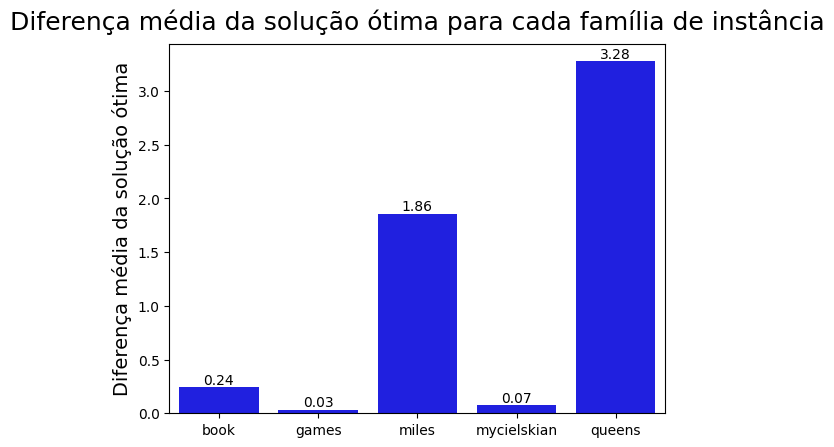

In [30]:
ax = sns.barplot(x=df_gulosos_2["familia"], y=df_gulosos_2["diff_resultado"], color= 'blue', estimator='mean', errorbar=None)
plt.title('Diferença média da solução ótima para cada família de instância', fontsize=18, pad=10)
plt.ylabel('Diferença média da solução ótima', fontsize=14)
plt.xlabel('', fontsize=14)
plt.bar_label(ax.containers[0], fmt='%.2f')
plt.show()

Realizando um cruzamento dos resultados de diferença para solução ótima por família e algoritmo, mostrando média

In [31]:
agg_alg_inst = df_gulosos_2.groupby(['algoritmo', 'familia'], group_keys=False)['diff_resultado'].mean().unstack(level='familia')
agg_alg_inst

familia,book,games,miles,mycielskian,queens
algoritmo,,,,,
dsatur,0.000,0.0,0.350,0.02,3.433333
guloso,0.325,0.0,2.375,0.08,3.266667
rlf,0.400,0.1,2.850,0.12,3.133333


Text(0.5, 23.52222222222222, 'Instâncias')

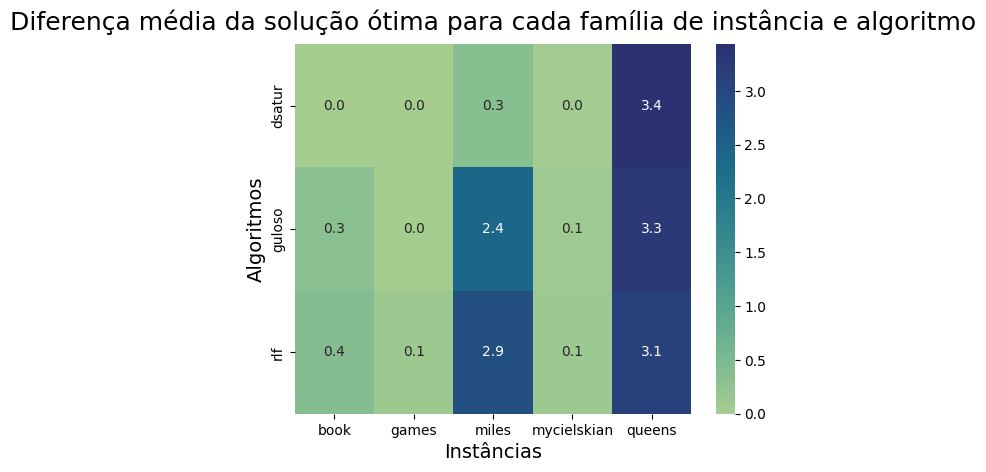

In [32]:
hm = sns.heatmap(data=agg_alg_inst, annot = True, cmap="crest",fmt=".1f")
plt.title('Diferença média da solução ótima para cada família de instância e algoritmo', fontsize=18, pad=10)
plt.ylabel('Algoritmos', fontsize=14)
plt.xlabel('Instâncias', fontsize=14)

## Análise do tempo de execução

Criando duas novas colunas numéricas para auxiliar na análise de tempo nn+m e nnn+m com base nas colunas de vértices e arestas

In [33]:
df_gulosos_2['nn+m'] = (df_gulosos_2['vertices'] * df_gulosos_2['vertices']) + df_gulosos_2['arestas']
df_gulosos_2['nnn+m'] = (df_gulosos_2['vertices'] * df_gulosos_2['vertices'] *df_gulosos_2['vertices']) + df_gulosos_2['arestas']
df_gulosos_2

,algoritmo,instancia,vertices,arestas,resultado,inicio,fim,Sol Ótima,familia,tempo_execucao,diff_resultado,nn+m,nnn+m
0,guloso,anna,138,493,11,2023-02-22 23:21:25.531310,2023-02-22 23:21:26.555160,11,book,1023.0,0,19537,2628565
1,dsatur,anna,138,493,11,2023-02-22 23:21:26.555180,2023-02-22 23:21:27.174465,11,book,619.0,0,19537,2628565
2,rlf,anna,138,493,12,2023-02-22 23:21:27.174469,2023-02-22 23:21:27.175066,11,book,0.0,1,19537,2628565
3,guloso,anna,138,493,12,2023-02-23 01:02:12.498937,2023-02-23 01:02:14.100725,11,book,1601.0,1,19537,2628565
4,dsatur,anna,138,493,11,2023-02-23 01:02:14.100731,2023-02-23 01:02:14.928728,11,book,827.0,0,19537,2628565
...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,dsatur,miles1000,128,3216,43,2023-03-07 17:27:02.634127,2023-03-07 17:27:03.182919,42,miles,548.0,1,19600,2100368
596,rlf,miles1000,128,3216,46,2023-03-07 17:27:03.182923,2023-03-07 17:27:03.184314,42,miles,1.0,4,19600,2100368
597,guloso,miles1000,128,3216,44,2023-03-07 20:02:14.079386,2023-03-07 20:02:14.841192,42,miles,761.0,2,19600,2100368
598,dsatur,miles1000,128,3216,44,2023-03-07 20:02:14.841197,2023-03-07 20:02:15.636809,42,miles,795.0,2,19600,2100368


Qual a distribuição de tempo de execução por quantidade de vértices, visualizando por algoritmo e por família de instância

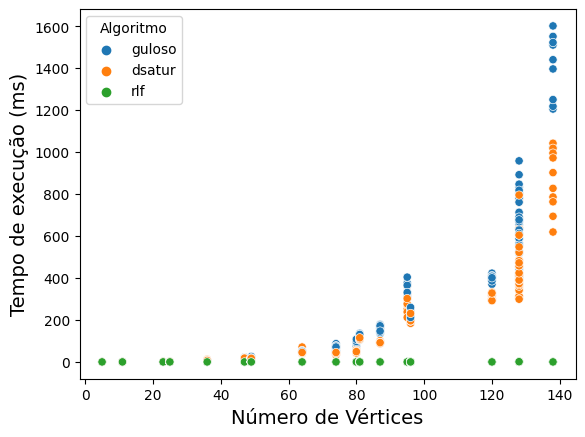

In [34]:
sns.scatterplot(data=df_gulosos_2, x="vertices", y="tempo_execucao", hue = "algoritmo")
plt.ylabel('Tempo de execução (ms)', fontsize=14)
plt.xlabel('Número de Vértices', fontsize=14)
plt.legend(title='Algoritmo')
plt.show()

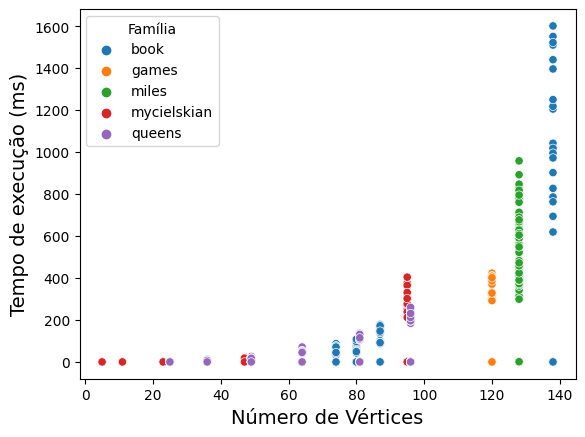

In [35]:
sns.scatterplot(data=df_gulosos_2, x="vertices", y="tempo_execucao", hue = "familia")
plt.ylabel('Tempo de execução (ms)', fontsize=14)
plt.xlabel('Número de Vértices', fontsize=14)
plt.legend(title='Família')
plt.show()

Qual a distribuição do tempo de execução por quantidade de arestas

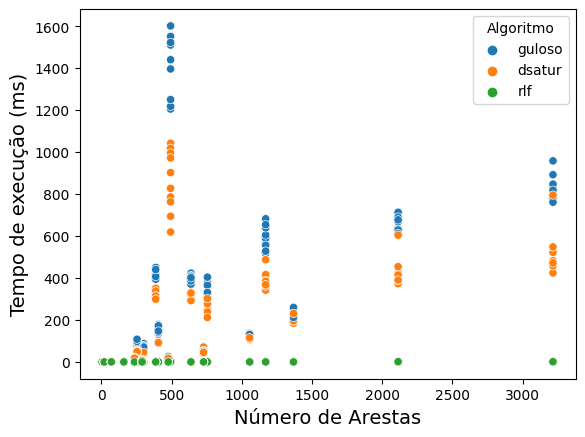

In [36]:
sns.scatterplot(data=df_gulosos_2, x="arestas", y="tempo_execucao", hue = "algoritmo")
plt.ylabel('Tempo de execução (ms)', fontsize=14)
plt.xlabel('Número de Arestas', fontsize=14)
plt.legend(title='Algoritmo')
plt.show()

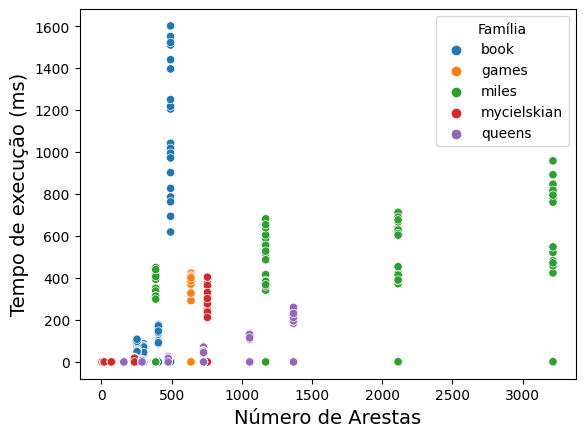

In [37]:
sns.scatterplot(data=df_gulosos_2, x="arestas", y="tempo_execucao", hue = "familia")
plt.ylabel('Tempo de execução (ms)', fontsize=14)
plt.xlabel('Número de Arestas', fontsize=14)
plt.legend(title='Família')
plt.show()

Avaliando a distribuição de tempo de execução por algoritmo de maneira mais precisa

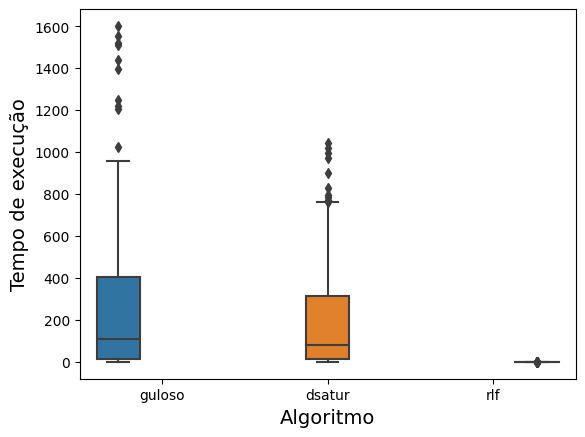

In [38]:
sns.boxplot(data=df_gulosos_2, x="algoritmo", y="tempo_execucao", hue = "algoritmo")
plt.ylabel('Tempo de execução', fontsize=14)
plt.xlabel('Algoritmo', fontsize=14)
plt.legend([], [], frameon=False)
plt.show()

# Análise dos algoritmos Meta-heurísticos

## Tabucol (Qualidade e Tempo de execução)

Criando dataset que trabalharemos sobre

In [39]:
df_tabucol = df_metaheuristicos_2.loc[df_metaheuristicos_2['algoritmo'] == "tabucol"].reset_index()
df_tabucol

,index,algoritmo,instancia,vertices,arestas,resultado,tabu,iteracoes_min,iteracoes_max,iteracoes_s_mud_mel,...,geracoes,cf_alfa,cf_beta,cf_evaporacao,inicio,fim,Sol Ótima,familia,tempo_execucao,diff_resultado
0,0,tabucol,huck,74,301,46,3,20,50,8,...,0,0.0,0.0,0.0,2023-02-24 20:44:55.307970,2023-02-24 20:44:55.322894,11,book,14.924,35
1,1,tabucol,huck,74,301,44,3,20,50,10,...,0,0.0,0.0,0.0,2023-02-24 20:44:55.823487,2023-02-24 20:44:55.836720,11,book,13.233,33
2,2,tabucol,huck,74,301,45,3,20,50,12,...,0,0.0,0.0,0.0,2023-02-24 20:44:56.337311,2023-02-24 20:44:56.351455,11,book,14.144,34
3,3,tabucol,huck,74,301,43,3,20,50,14,...,0,0.0,0.0,0.0,2023-02-24 20:44:56.852052,2023-02-24 20:44:56.865382,11,book,13.330,32
4,4,tabucol,huck,74,301,47,5,20,50,8,...,0,0.0,0.0,0.0,2023-02-24 20:44:57.365949,2023-02-24 20:44:57.372977,11,book,7.028,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,12747,tabucol,miles1000,128,3216,79,7,20,50,14,...,0,0.0,0.0,0.0,2023-03-07 20:02:23.034978,2023-03-07 20:02:23.229919,42,miles,194.941,37
3196,12748,tabucol,miles1000,128,3216,92,9,20,50,8,...,0,0.0,0.0,0.0,2023-03-07 20:02:23.730504,2023-03-07 20:02:23.897583,42,miles,167.079,50
3197,12749,tabucol,miles1000,128,3216,90,9,20,50,10,...,0,0.0,0.0,0.0,2023-03-07 20:02:24.398173,2023-03-07 20:02:24.530479,42,miles,132.306,48
3198,12750,tabucol,miles1000,128,3216,81,9,20,50,12,...,0,0.0,0.0,0.0,2023-03-07 20:02:25.031061,2023-03-07 20:02:25.214369,42,miles,183.308,39


Distribuição da diferença para o ótimo por quantidade de vértices

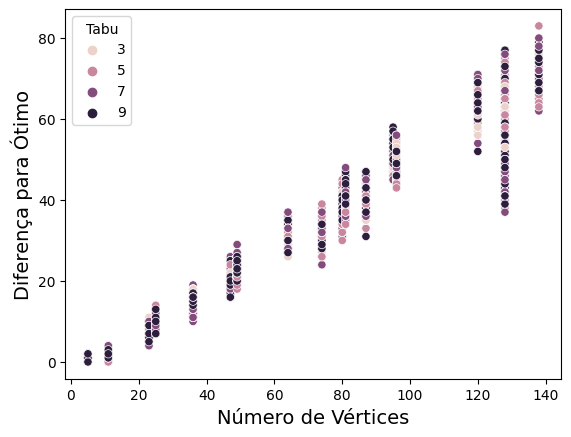

In [40]:
sns.scatterplot(data=df_tabucol, x="vertices", y="diff_resultado", hue = "tabu")
plt.ylabel('Diferença para Ótimo', fontsize=14)
plt.xlabel('Número de Vértices', fontsize=14)
plt.legend(title='Tabu')
plt.show()

Avaliando se realmente os valores de distribuição estão iguais para todos os valores tabu

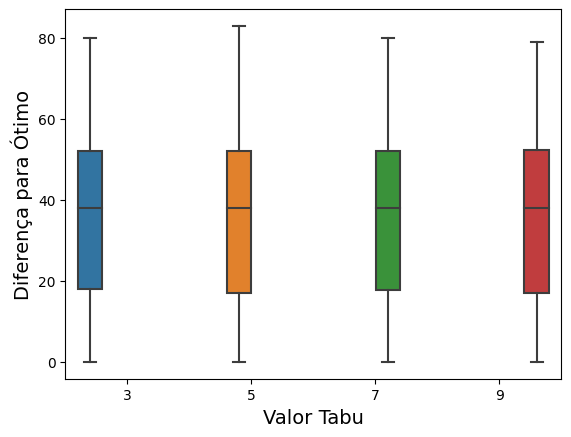

In [41]:
sns.boxplot(data=df_tabucol, x="tabu", y="diff_resultado", hue = "tabu")
plt.ylabel('Diferença para Ótimo', fontsize=14)
plt.xlabel('Valor Tabu', fontsize=14)
plt.legend([], [], frameon=False)
plt.show()

Repetindo o processo para coluna de iterações sem mudança

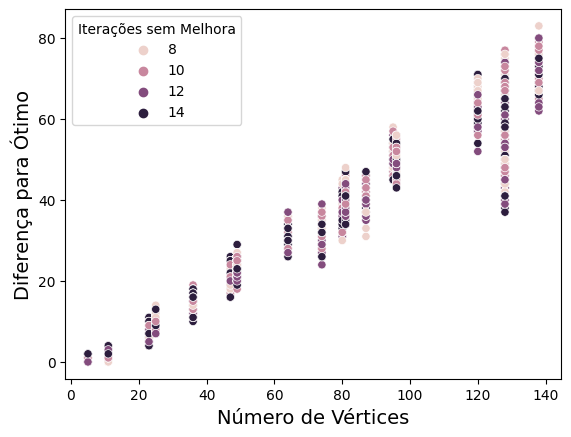

In [42]:
sns.scatterplot(data=df_tabucol, x="vertices", y="diff_resultado", hue = "iteracoes_s_mud_mel")
plt.ylabel('Diferença para Ótimo', fontsize=14)
plt.xlabel('Número de Vértices', fontsize=14)
plt.legend(title='Iterações sem Melhora')
plt.show()

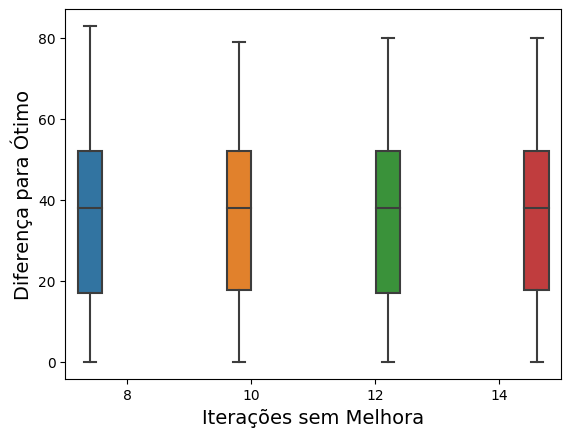

In [43]:
sns.boxplot(data=df_tabucol, x="iteracoes_s_mud_mel", y="diff_resultado", hue = "iteracoes_s_mud_mel")
plt.ylabel('Diferença para Ótimo', fontsize=14)
plt.xlabel('Iterações sem Melhora', fontsize=14)
plt.legend([], [], frameon=False)
plt.show()

Por fim, vamos repetir o processo mas separando por família de instância

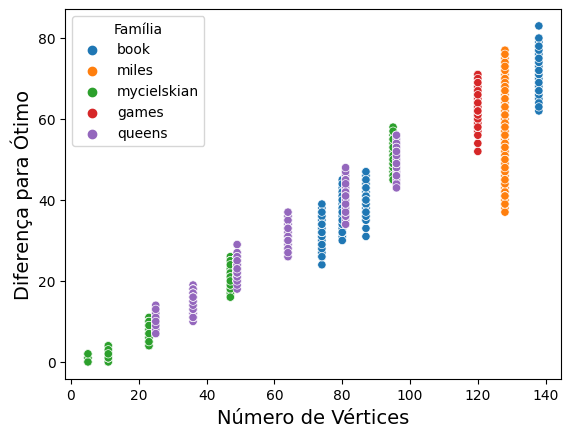

In [44]:
sns.scatterplot(data=df_tabucol, x="vertices", y="diff_resultado", hue = "familia")
plt.ylabel('Diferença para Ótimo', fontsize=14)
plt.xlabel('Número de Vértices', fontsize=14)
plt.legend(title='Família')
plt.show()

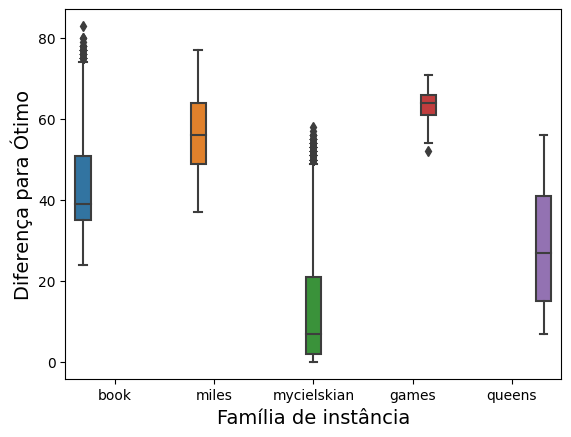

In [45]:
sns.boxplot(data=df_tabucol, x="familia", y="diff_resultado", hue = "familia")
plt.ylabel('Diferença para Ótimo', fontsize=14)
plt.xlabel('Família de instância', fontsize=14)
plt.legend([], [], frameon=False)
plt.show()

Avaliando agora a distribuição de tempo por número de vértices e arestas

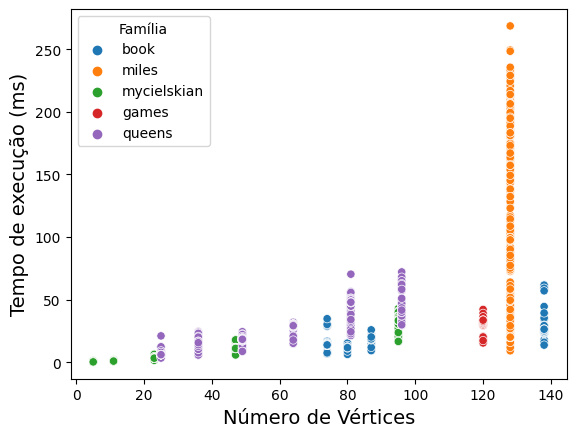

In [46]:
sns.scatterplot(data=df_tabucol, x="vertices", y="tempo_execucao", hue = "familia")
plt.ylabel('Tempo de execução (ms)', fontsize=14)
plt.xlabel('Número de Vértices', fontsize=14)
plt.legend(title='Família')
plt.show()

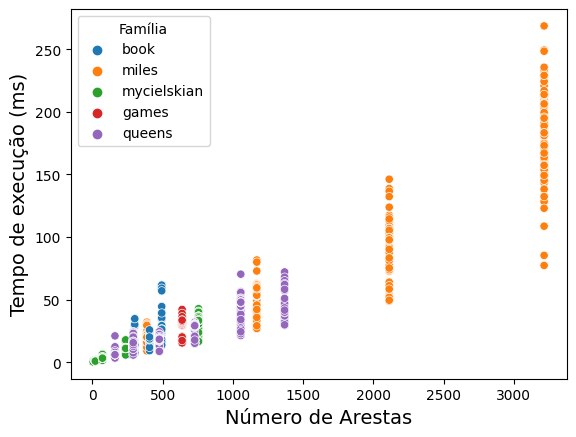

In [47]:
sns.scatterplot(data=df_tabucol, x="arestas", y="tempo_execucao", hue = "familia")
plt.ylabel('Tempo de execução (ms)', fontsize=14)
plt.xlabel('Número de Arestas', fontsize=14)
plt.legend(title='Família')
plt.show()

## Hill - Climbing

In [48]:
df_hill = df_metaheuristicos_2.loc[df_metaheuristicos_2['algoritmo'] == "hill climbing"].reset_index()
df_hill

,index,algoritmo,instancia,vertices,arestas,resultado,tabu,iteracoes_min,iteracoes_max,iteracoes_s_mud_mel,...,geracoes,cf_alfa,cf_beta,cf_evaporacao,inicio,fim,Sol Ótima,familia,tempo_execucao,diff_resultado
0,32,hill climbing,huck,74,301,11,0,0,40,10,...,0,0.0,0.0,0.0,2023-02-24 20:45:03.532882,2023-02-24 20:45:04.556543,11,book,1023.661,0
1,33,hill climbing,huck,74,301,11,0,0,45,10,...,0,0.0,0.0,0.0,2023-02-24 20:45:05.057122,2023-02-24 20:45:06.315352,11,book,1258.230,0
2,34,hill climbing,huck,74,301,11,0,0,50,10,...,0,0.0,0.0,0.0,2023-02-24 20:45:06.815940,2023-02-24 20:45:07.936532,11,book,1120.592,0
3,35,hill climbing,huck,74,301,11,0,0,55,10,...,0,0.0,0.0,0.0,2023-02-24 20:45:08.437099,2023-02-24 20:45:09.749362,11,book,1312.263,0
4,36,hill climbing,huck,74,301,11,0,0,40,10,...,0,0.0,0.0,0.0,2023-02-24 20:45:10.249926,2023-02-24 20:45:11.576680,11,book,1326.754,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,12779,hill climbing,miles1000,128,3216,44,0,0,55,10,...,0,0.0,0.0,0.0,2023-03-07 20:06:40.438493,2023-03-07 20:07:00.064385,42,miles,19625.892,2
3196,12780,hill climbing,miles1000,128,3216,43,0,0,40,10,...,0,0.0,0.0,0.0,2023-03-07 20:07:00.564942,2023-03-07 20:07:32.420057,42,miles,31855.115,1
3197,12781,hill climbing,miles1000,128,3216,44,0,0,45,10,...,0,0.0,0.0,0.0,2023-03-07 20:07:32.920619,2023-03-07 20:08:07.644929,42,miles,34724.310,2
3198,12782,hill climbing,miles1000,128,3216,45,0,0,50,10,...,0,0.0,0.0,0.0,2023-03-07 20:08:08.145491,2023-03-07 20:08:32.126311,42,miles,23980.820,3


Começando com um histograma de qualidade de solução geral

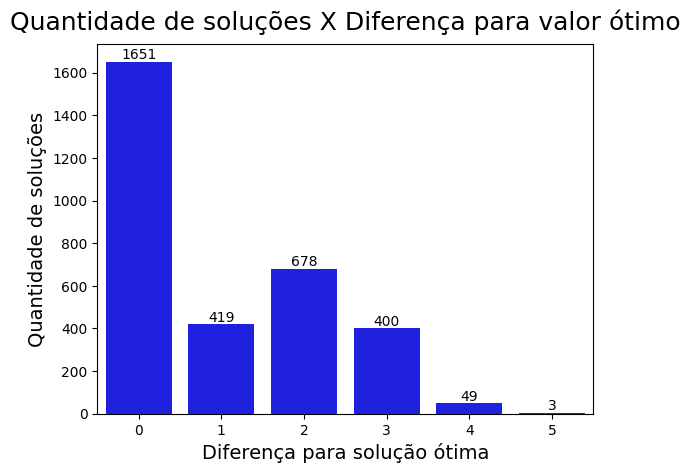

In [49]:
ax = sns.countplot(x=df_hill["diff_resultado"], color="blue")
plt.title('Quantidade de soluções X Diferença para valor ótimo', fontsize=18, pad=10)
plt.ylabel('Quantidade de soluções', fontsize=14)
plt.xlabel('Diferença para solução ótima', fontsize=14)
plt.bar_label(ax.containers[0], fmt='%.0f')
plt.show()

Avaliando como os parâmetros afetam a distribuição da qualidade da solução

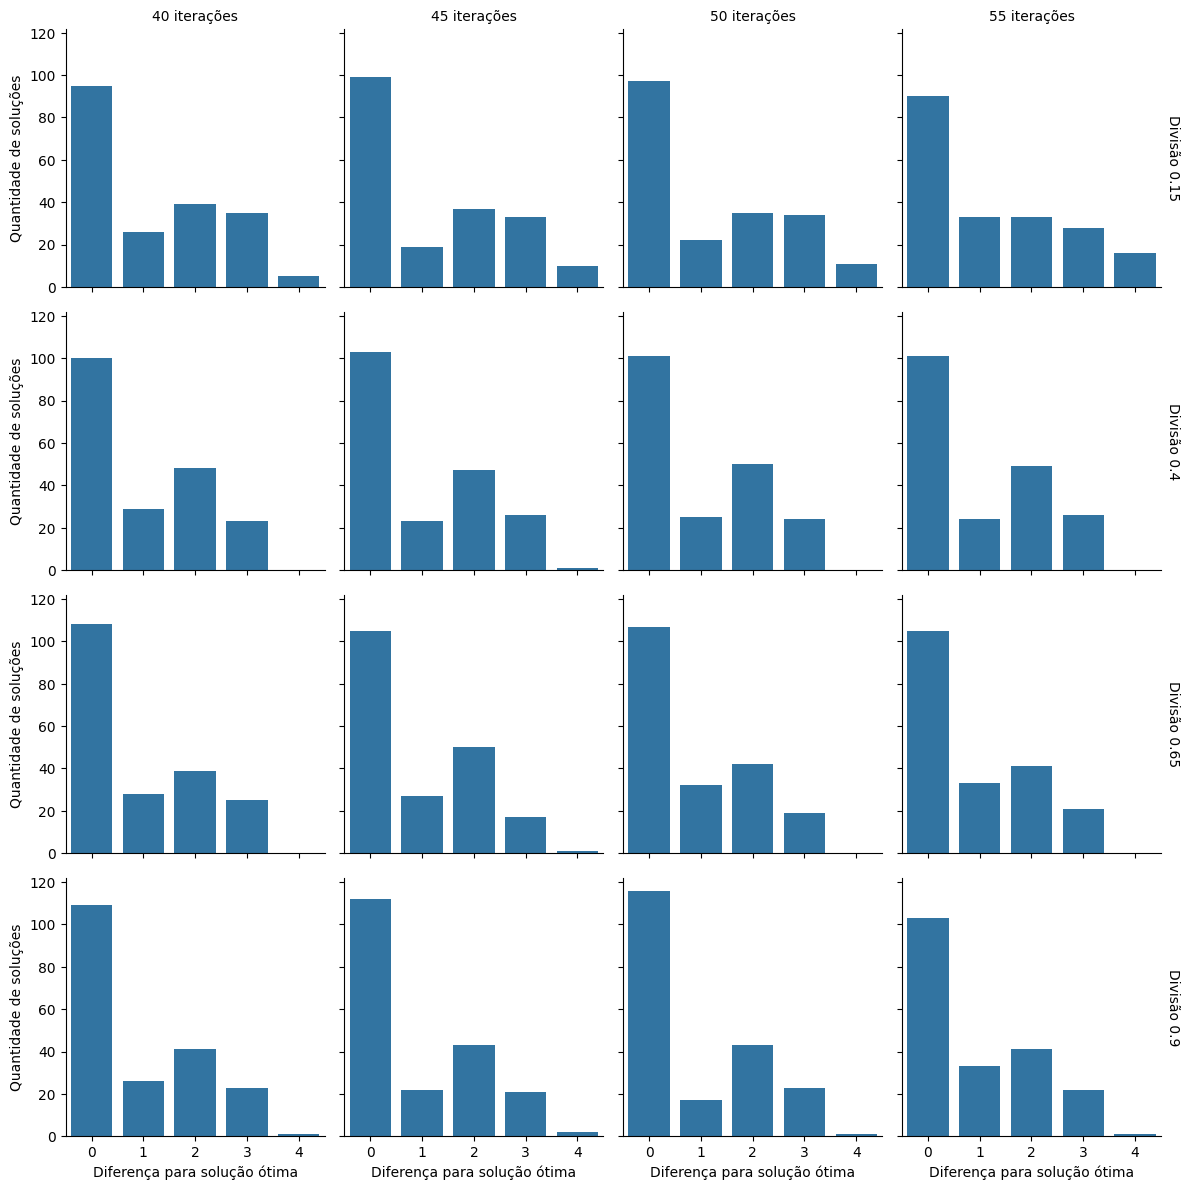

In [50]:
g = sns.FacetGrid(df_hill, col="iteracoes_max", row = "hc_div", margin_titles=True)
g.map_dataframe(sns.countplot, x="diff_resultado")
g.set_axis_labels("Diferença para solução ótima", "Quantidade de soluções")
g.set_titles(col_template="{col_name} iterações", row_template = "Divisão {row_name}")
plt.show()

Avaliando a relação da qualidade de solução separando por família

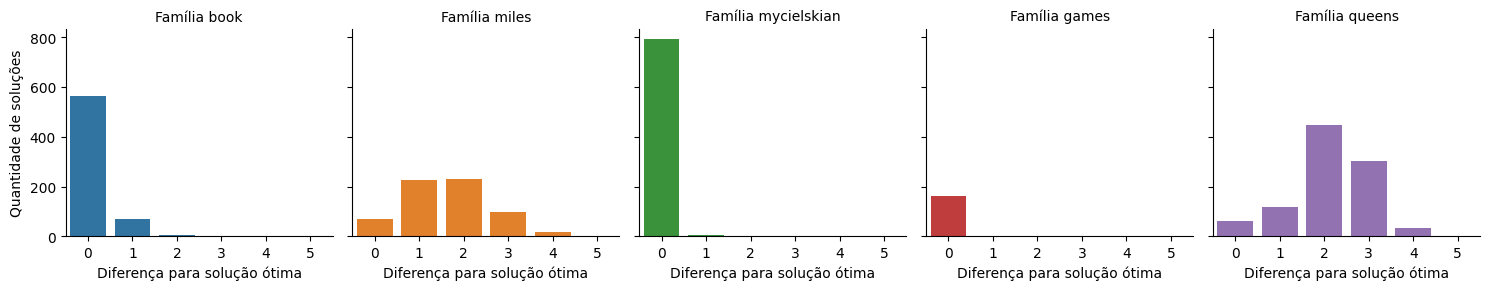

In [51]:
g = sns.FacetGrid(df_hill, col="familia", margin_titles=True, hue="familia")
g.map_dataframe(sns.countplot, x="diff_resultado")
g.set_axis_labels("Diferença para solução ótima", "Quantidade de soluções")
g.set_titles(col_template="Família {col_name}")
plt.show()

Mostrando tempo de execução por quantidade de vértices e arestas

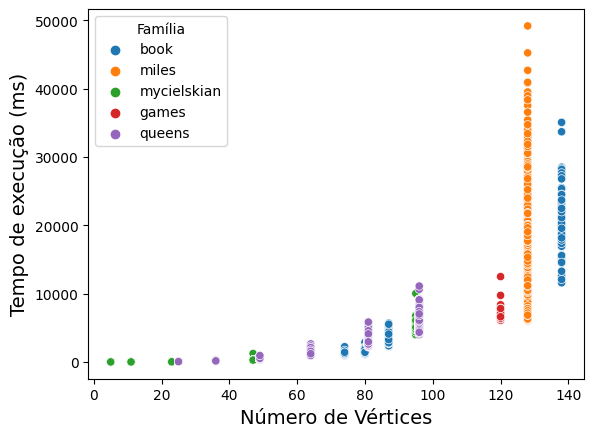

In [52]:
sns.scatterplot(data=df_hill, x="vertices", y="tempo_execucao", hue = "familia")
plt.ylabel('Tempo de execução (ms)', fontsize=14)
plt.xlabel('Número de Vértices', fontsize=14)
plt.legend(title='Família')
plt.show()

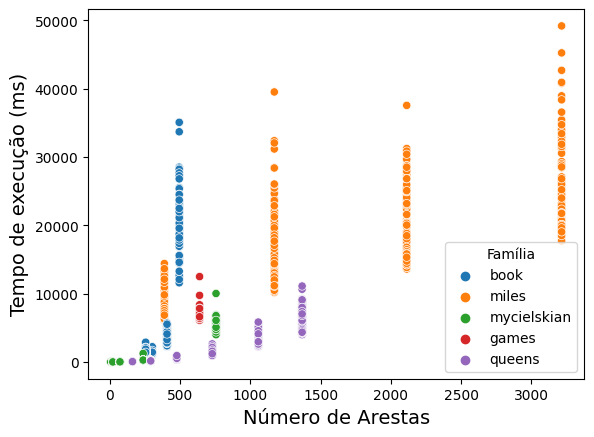

In [53]:
sns.scatterplot(data=df_hill, x="arestas", y="tempo_execucao", hue = "familia")
plt.ylabel('Tempo de execução (ms)', fontsize=14)
plt.xlabel('Número de Arestas', fontsize=14)
plt.legend(title='Família')
plt.show()

## Evolucionário

Filtrando linhas do evolucionario

In [54]:
df_evolu = df_metaheuristicos_2.loc[df_metaheuristicos_2['algoritmo'] == "evolucionario"].reset_index()
df_evolu

,index,algoritmo,instancia,vertices,arestas,resultado,tabu,iteracoes_min,iteracoes_max,iteracoes_s_mud_mel,...,geracoes,cf_alfa,cf_beta,cf_evaporacao,inicio,fim,Sol Ótima,familia,tempo_execucao,diff_resultado
0,16,evolucionario,huck,74,301,14,0,0,0,0,...,10,0.0,0.0,0.0,2023-02-24 20:45:32.411421,2023-02-24 20:45:32.804382,11,book,392.961,3
1,17,evolucionario,huck,74,301,14,0,0,0,0,...,15,0.0,0.0,0.0,2023-02-24 20:45:33.304944,2023-02-24 20:45:33.715037,11,book,410.093,3
2,18,evolucionario,huck,74,301,15,0,0,0,0,...,20,0.0,0.0,0.0,2023-02-24 20:45:34.215607,2023-02-24 20:45:34.609379,11,book,393.772,4
3,19,evolucionario,huck,74,301,15,0,0,0,0,...,25,0.0,0.0,0.0,2023-02-24 20:45:35.109941,2023-02-24 20:45:35.520821,11,book,410.880,4
4,20,evolucionario,huck,74,301,11,0,0,0,0,...,10,0.0,0.0,0.0,2023-02-24 20:45:36.021388,2023-02-24 20:45:36.624329,11,book,602.941,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,12763,evolucionario,miles1000,128,3216,44,0,0,0,0,...,25,0.0,0.0,0.0,2023-03-07 20:10:28.262016,2023-03-07 20:10:39.988954,42,miles,11726.938,2
3196,12764,evolucionario,miles1000,128,3216,44,0,0,0,0,...,10,0.0,0.0,0.0,2023-03-07 20:10:40.489516,2023-03-07 20:10:55.575027,42,miles,15085.511,2
3197,12765,evolucionario,miles1000,128,3216,45,0,0,0,0,...,15,0.0,0.0,0.0,2023-03-07 20:10:56.075591,2023-03-07 20:11:10.543255,42,miles,14467.664,3
3198,12766,evolucionario,miles1000,128,3216,42,0,0,0,0,...,20,0.0,0.0,0.0,2023-03-07 20:11:11.043838,2023-03-07 20:11:26.047492,42,miles,15003.654,0


Começando com um histograma de qualidade da solução geral

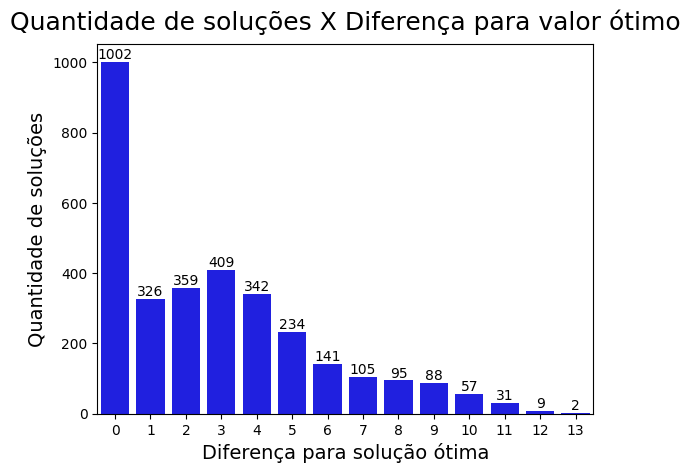

In [55]:
ax = sns.countplot(x=df_evolu["diff_resultado"], color="blue")
plt.title('Quantidade de soluções X Diferença para valor ótimo', fontsize=18, pad=10)
plt.ylabel('Quantidade de soluções', fontsize=14)
plt.xlabel('Diferença para solução ótima', fontsize=14)
plt.bar_label(ax.containers[0], fmt='%.0f')
plt.show()

Abrindo esse gráfico pelos parâmetros que foram variados (população e gerações)

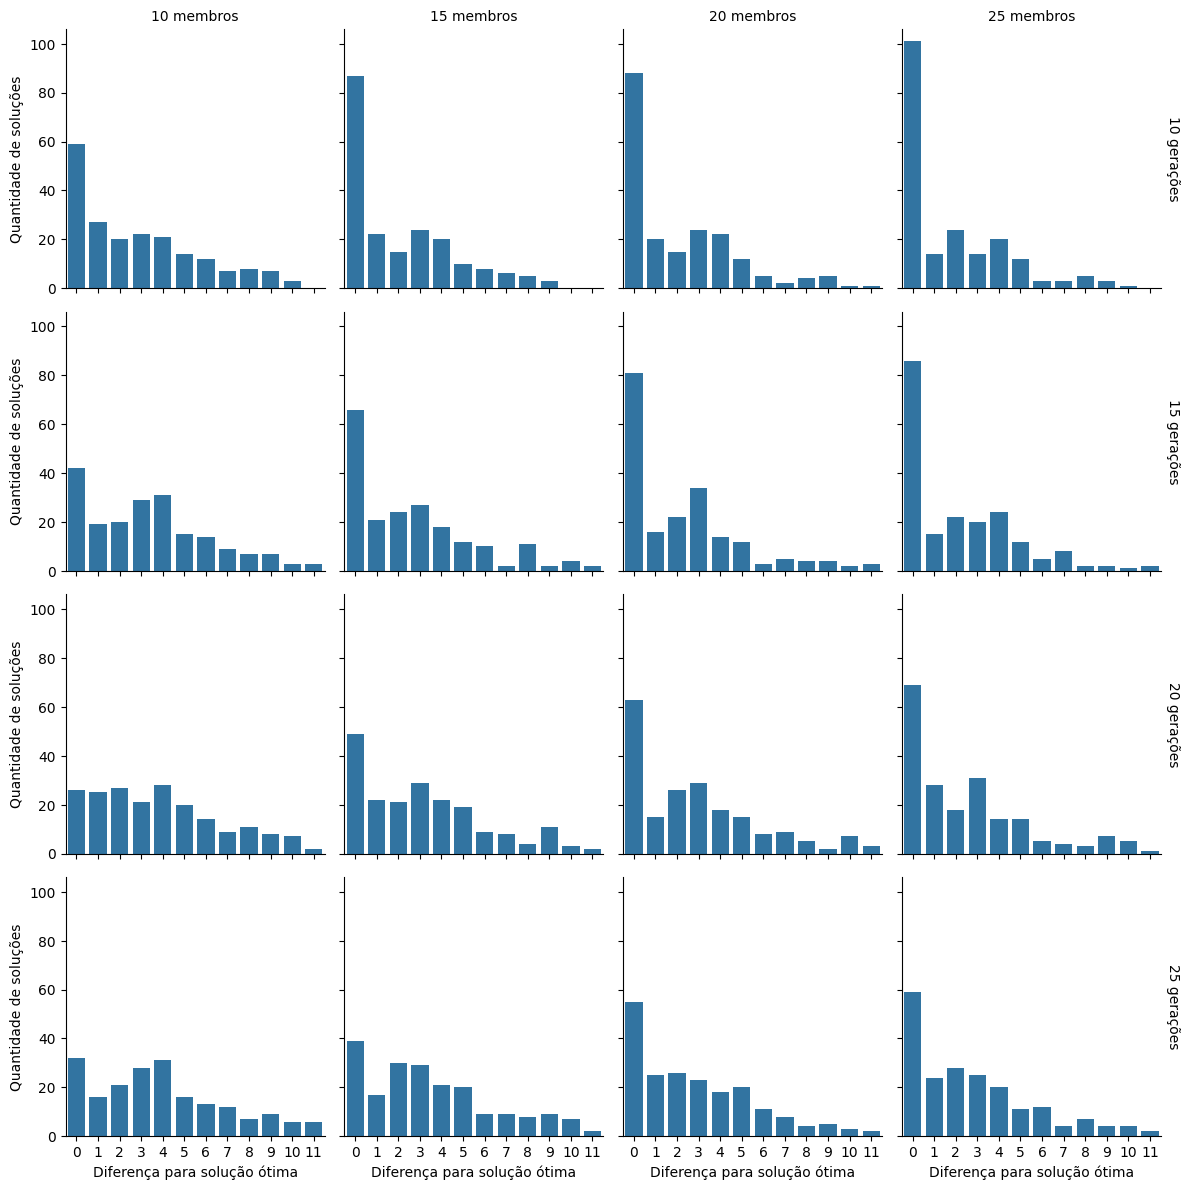

In [56]:
g = sns.FacetGrid(df_evolu, col="populacao", row = "geracoes", margin_titles=True, xlim=13)
g.map_dataframe(sns.countplot, x="diff_resultado")
g.set_axis_labels("Diferença para solução ótima", "Quantidade de soluções")
g.set_titles(col_template="{col_name} membros", row_template = "{row_name} gerações")
plt.show()

Fazendo uma avaliação por família de instância

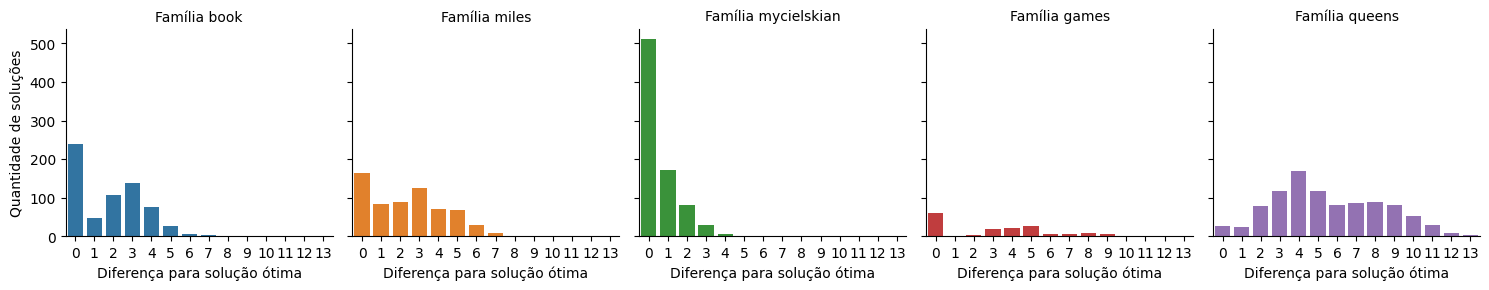

In [57]:
g = sns.FacetGrid(df_evolu, col="familia", margin_titles=True, hue="familia")
g.map_dataframe(sns.countplot, x="diff_resultado")
g.set_axis_labels("Diferença para solução ótima", "Quantidade de soluções")
g.set_titles(col_template="Família {col_name}")
plt.show()

Avaliando o tempo de execução por quantidade de vértices e arestas

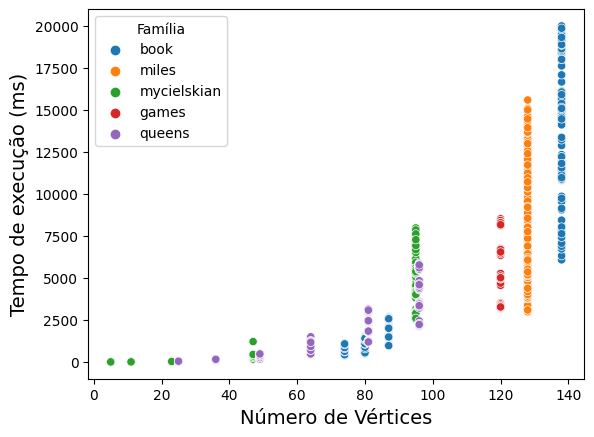

In [58]:
sns.scatterplot(data=df_evolu, x="vertices", y="tempo_execucao", hue = "familia")
plt.ylabel('Tempo de execução (ms)', fontsize=14)
plt.xlabel('Número de Vértices', fontsize=14)
plt.legend(title='Família')
plt.show()

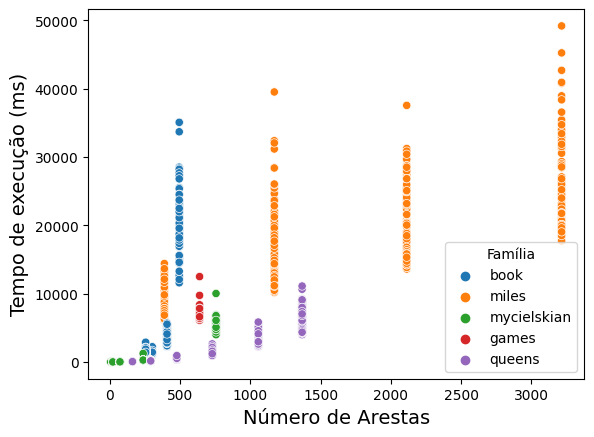

In [59]:
sns.scatterplot(data=df_hill, x="arestas", y="tempo_execucao", hue = "familia")
plt.ylabel('Tempo de execução (ms)', fontsize=14)
plt.xlabel('Número de Arestas', fontsize=14)
plt.legend(title='Família')
plt.show()

## Colônia de Formigas

In [60]:
df_col = df_metaheuristicos_2.loc[df_metaheuristicos_2['algoritmo'] == "colonia formigas"].reset_index()
df_col['tempo_execucao_s'] = df_col['tempo_execucao'] / 1000
df_col

,index,algoritmo,instancia,vertices,arestas,resultado,tabu,iteracoes_min,iteracoes_max,iteracoes_s_mud_mel,...,cf_alfa,cf_beta,cf_evaporacao,inicio,fim,Sol Ótima,familia,tempo_execucao,diff_resultado,tempo_execucao_s
0,48,colonia formigas,huck,74,301,14,0,0,20,0,...,1.0,1.0,0.15,2023-02-24 20:45:51.614162,2023-02-24 20:46:25.692007,11,book,34077.845,3,34.077845
1,49,colonia formigas,huck,74,301,12,0,0,20,0,...,1.0,1.0,0.40,2023-02-24 20:46:26.192577,2023-02-24 20:47:21.569112,11,book,55376.535,1,55.376535
2,50,colonia formigas,huck,74,301,13,0,0,20,0,...,1.0,1.0,0.65,2023-02-24 20:47:22.069681,2023-02-24 20:47:54.060786,11,book,31991.105,2,31.991105
3,51,colonia formigas,huck,74,301,14,0,0,20,0,...,1.0,1.0,0.90,2023-02-24 20:47:54.561361,2023-02-24 20:48:28.473755,11,book,33912.394,3,33.912394
4,52,colonia formigas,huck,74,301,13,0,0,20,0,...,1.0,1.0,0.15,2023-02-24 20:48:28.974332,2023-02-24 20:49:18.979744,11,book,50005.412,2,50.005412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,12795,colonia formigas,miles1000,128,3216,47,0,0,20,0,...,1.0,1.0,0.90,2023-03-07 21:35:10.586666,2023-03-07 21:45:44.747388,42,miles,634160.722,5,634.160722
3196,12796,colonia formigas,miles1000,128,3216,48,0,0,20,0,...,1.0,1.0,0.15,2023-03-07 21:45:45.247957,2023-03-07 21:58:46.247935,42,miles,780999.978,6,780.999978
3197,12797,colonia formigas,miles1000,128,3216,49,0,0,20,0,...,1.0,1.0,0.40,2023-03-07 21:58:46.748496,2023-03-07 22:11:47.799129,42,miles,781050.633,7,781.050633
3198,12798,colonia formigas,miles1000,128,3216,45,0,0,20,0,...,1.0,1.0,0.65,2023-03-07 22:11:48.299696,2023-03-07 22:28:22.976796,42,miles,994677.100,3,994.677100


Histograma de qualidade de solução

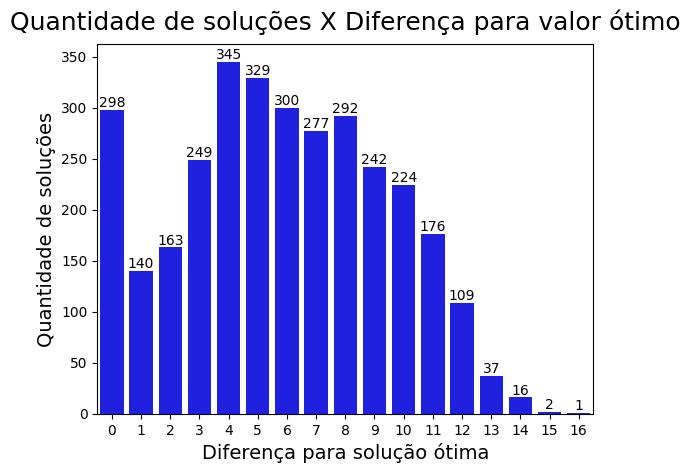

In [61]:
ax = sns.countplot(x=df_col["diff_resultado"], color="blue")
plt.title('Quantidade de soluções X Diferença para valor ótimo', fontsize=18, pad=10)
plt.ylabel('Quantidade de soluções', fontsize=14)
plt.xlabel('Diferença para solução ótima', fontsize=14)
plt.bar_label(ax.containers[0], fmt='%.0f')
plt.show()

Avaliando como os parâmetros variados afetaram a qualidade da solução

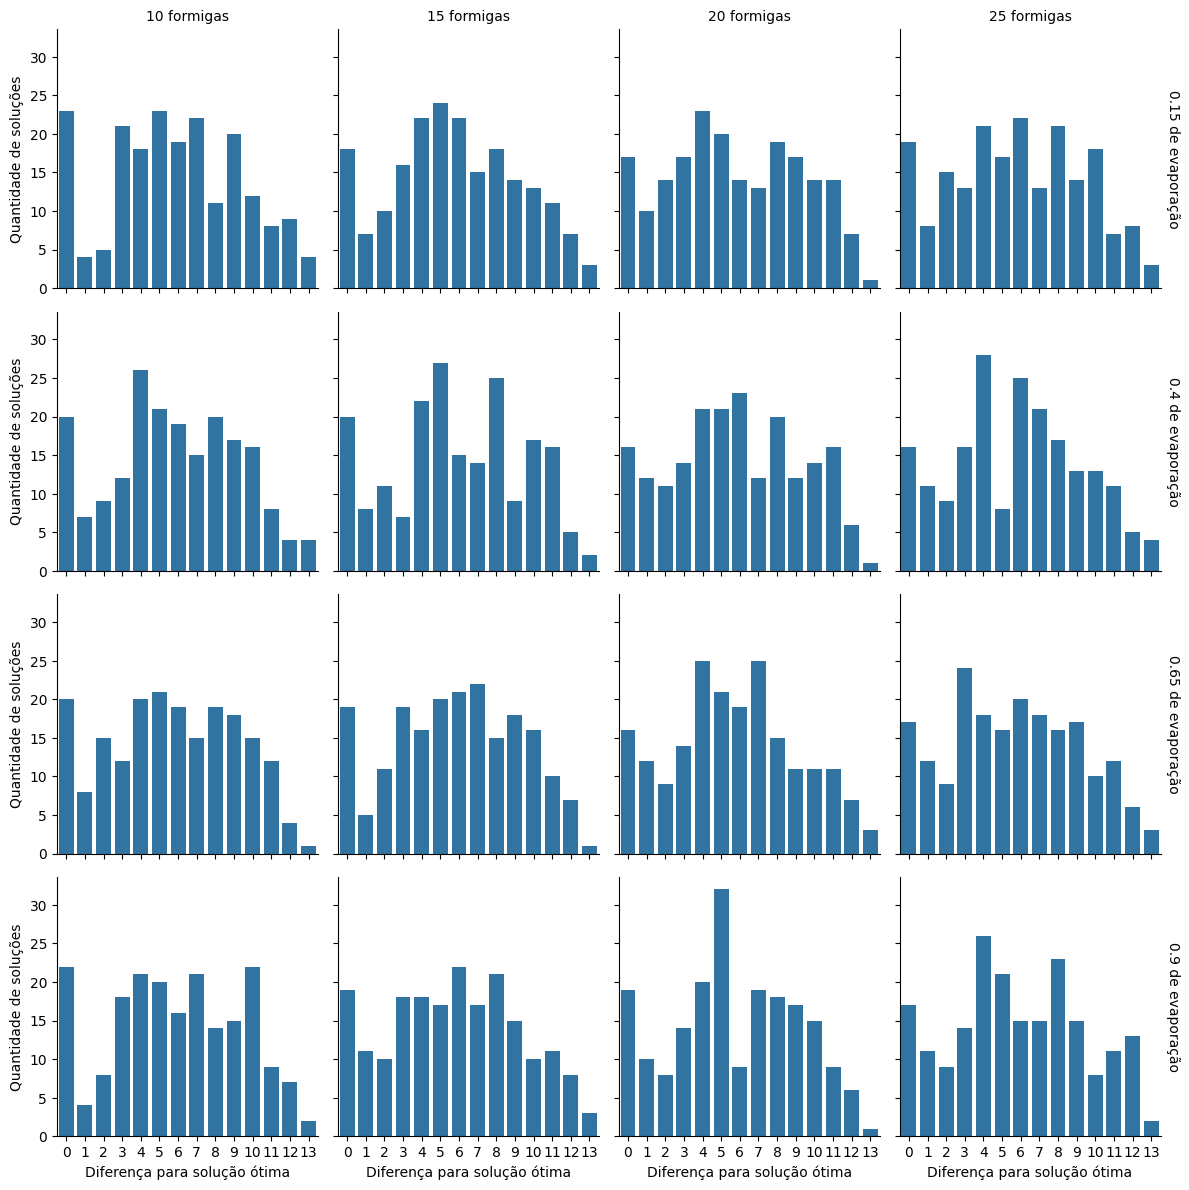

In [62]:
g = sns.FacetGrid(df_col, col="populacao", row = "cf_evaporacao", margin_titles=True, xlim= 16)
g.map_dataframe(sns.countplot, x="diff_resultado")
g.set_axis_labels("Diferença para solução ótima", "Quantidade de soluções")
g.set_titles(col_template="{col_name} formigas", row_template = "{row_name} de evaporação")
plt.show()

Analisando por família de instância

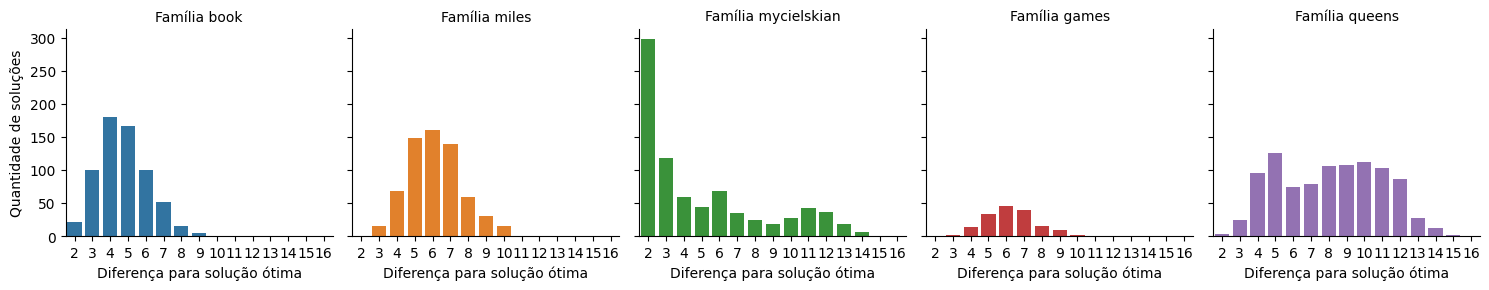

In [63]:
g = sns.FacetGrid(df_col, col="familia", margin_titles=True, hue="familia", xlim = 16)
g.map_dataframe(sns.countplot, x="diff_resultado")
g.set_axis_labels("Diferença para solução ótima", "Quantidade de soluções")
g.set_titles(col_template="Família {col_name}")
plt.show()

Por fim, vamos analisar o tempo de execução em ms avaliando quantidade de arestas e vértices

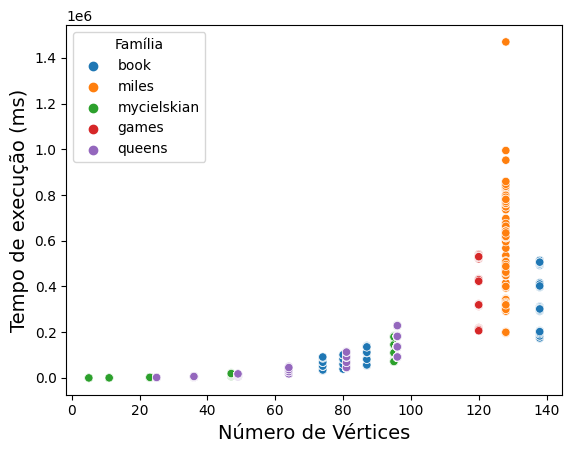

In [64]:
sns.scatterplot(data=df_col, x="vertices", y="tempo_execucao", hue = "familia")
plt.ylabel('Tempo de execução (ms)', fontsize=14)
plt.xlabel('Número de Vértices', fontsize=14)
plt.legend(title='Família')
plt.show()

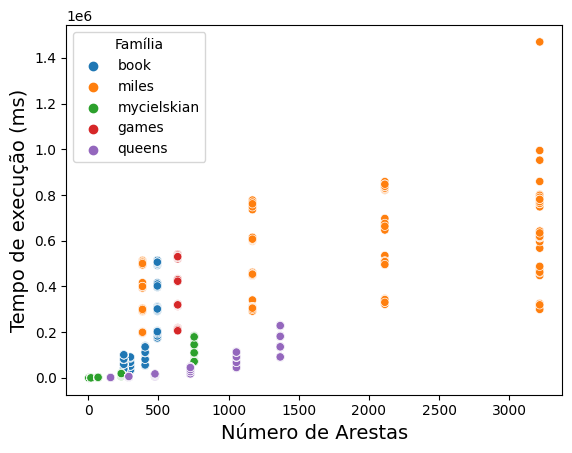

In [65]:
sns.scatterplot(data=df_col, x="arestas", y="tempo_execucao", hue = "familia")
plt.ylabel('Tempo de execução (ms)', fontsize=14)
plt.xlabel('Número de Arestas', fontsize=14)
plt.legend(title='Família')
plt.show()

## Comparação algoritmos com resultados razoáveis (hc, evolu, col)

In [66]:
df_comp = df_metaheuristicos_2.loc[(df_metaheuristicos_2['algoritmo'] == "hill climbing") |
                                   (df_metaheuristicos_2['algoritmo'] == "evolucionario") |
                                   (df_metaheuristicos_2['algoritmo'] == "colonia formigas")].reset_index()
df_comp

,index,algoritmo,instancia,vertices,arestas,resultado,tabu,iteracoes_min,iteracoes_max,iteracoes_s_mud_mel,...,geracoes,cf_alfa,cf_beta,cf_evaporacao,inicio,fim,Sol Ótima,familia,tempo_execucao,diff_resultado
0,16,evolucionario,huck,74,301,14,0,0,0,0,...,10,0.0,0.0,0.00,2023-02-24 20:45:32.411421,2023-02-24 20:45:32.804382,11,book,392.961,3
1,17,evolucionario,huck,74,301,14,0,0,0,0,...,15,0.0,0.0,0.00,2023-02-24 20:45:33.304944,2023-02-24 20:45:33.715037,11,book,410.093,3
2,18,evolucionario,huck,74,301,15,0,0,0,0,...,20,0.0,0.0,0.00,2023-02-24 20:45:34.215607,2023-02-24 20:45:34.609379,11,book,393.772,4
3,19,evolucionario,huck,74,301,15,0,0,0,0,...,25,0.0,0.0,0.00,2023-02-24 20:45:35.109941,2023-02-24 20:45:35.520821,11,book,410.880,4
4,20,evolucionario,huck,74,301,11,0,0,0,0,...,10,0.0,0.0,0.00,2023-02-24 20:45:36.021388,2023-02-24 20:45:36.624329,11,book,602.941,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9595,12795,colonia formigas,miles1000,128,3216,47,0,0,20,0,...,0,1.0,1.0,0.90,2023-03-07 21:35:10.586666,2023-03-07 21:45:44.747388,42,miles,634160.722,5
9596,12796,colonia formigas,miles1000,128,3216,48,0,0,20,0,...,0,1.0,1.0,0.15,2023-03-07 21:45:45.247957,2023-03-07 21:58:46.247935,42,miles,780999.978,6
9597,12797,colonia formigas,miles1000,128,3216,49,0,0,20,0,...,0,1.0,1.0,0.40,2023-03-07 21:58:46.748496,2023-03-07 22:11:47.799129,42,miles,781050.633,7
9598,12798,colonia formigas,miles1000,128,3216,45,0,0,20,0,...,0,1.0,1.0,0.65,2023-03-07 22:11:48.299696,2023-03-07 22:28:22.976796,42,miles,994677.100,3


Vamos comparar a qualidade média da solução para os três algoritmos

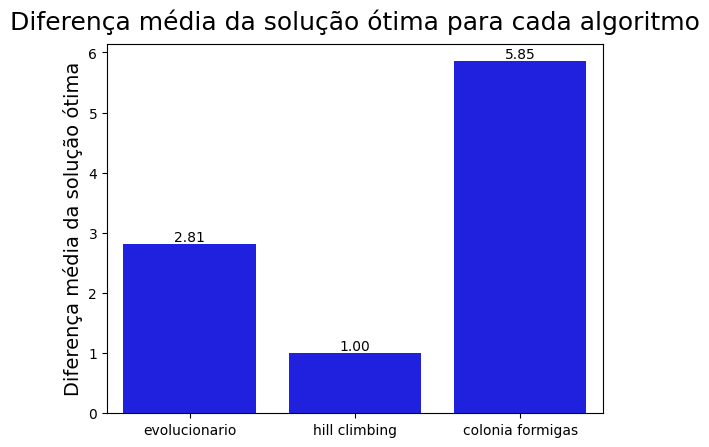

In [67]:
ax = sns.barplot(x=df_comp["algoritmo"], y=df_comp["diff_resultado"], color= 'blue', estimator='mean', errorbar=None)
plt.title('Diferença média da solução ótima para cada algoritmo', fontsize=18, pad=10)
plt.ylabel('Diferença média da solução ótima', fontsize=14)
plt.xlabel('', fontsize=14)
plt.bar_label(ax.containers[0], fmt='%.2f')
plt.show()

Também vamos ver a diferença média para cada família de instância

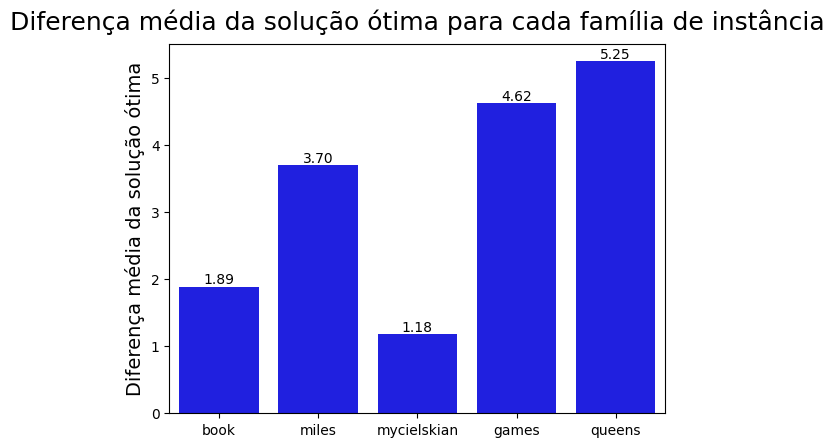

In [68]:
ax = sns.barplot(x=df_comp["familia"], y=df_comp["diff_resultado"], color= 'blue', estimator='mean', errorbar=None)
plt.title('Diferença média da solução ótima para cada família de instância', fontsize=18, pad=10)
plt.ylabel('Diferença média da solução ótima', fontsize=14)
plt.xlabel('', fontsize=14)
plt.bar_label(ax.containers[0], fmt='%.2f')
plt.show()

Por fim, vamos cruzar os dados para analisar o desempenho médio de cada algoritmo em cada família de instância